In [1]:
# @author: Xinxin Tang
# email: xinxin_tang@gwu.edu

import pandas as pd
import copy 

# import dataset 
data = pd.read_csv("/Users/xinxintang/Desktop/Projects/Python/面试/klaviyo/Klaviyo_DS_Screen_2.csv")
col = ['customer_id', 'gender', 'date', 'value']
data = pd.DataFrame(data, columns=col)
print(data.head())

   customer_id  gender         date  value
0         1000       0  1/1/17 0:11  198.5
1         1001       0  1/1/17 0:29  338.0
2         1002       1  1/1/17 1:30  733.0
3         1003       1  1/1/17 1:34  772.0
4         1004       0  1/1/17 3:11  508.0


In [2]:
# A: Assemble a dataframe with one row per customer 
data_a = copy.deepcopy(data)
data_a['Order_count'] = data_a.groupby('customer_id')['customer_id'].transform('count')
data_dup = data_a.drop_duplicates('customer_id').sort_values(by=['customer_id'])
data_dup.rename(columns={"date":"most_recent_date"}, inplace=True)
data_dup = data_dup.drop(['value'], axis=1)
print(data_dup)

       customer_id  gender most_recent_date  Order_count
0             1000       0      1/1/17 0:11            1
1             1001       0      1/1/17 0:29            1
2             1002       1      1/1/17 1:30            3
3             1003       1      1/1/17 1:34            4
4             1004       0      1/1/17 3:11            1
5             1005       1     1/1/17 10:08            2
6             1006       1     1/1/17 15:42            3
7             1007       0     1/1/17 15:59            1
8             1008       0     1/1/17 18:01            3
9             1009       1     1/1/17 19:27            1
10            1010       1     1/1/17 19:41            2
11            1011       1     1/1/17 22:04            1
12            1012       1     1/1/17 22:08            1
13            1013       0     1/1/17 23:51            1
14            1014       1      1/2/17 0:28            1
15            1015       0      1/2/17 1:20            4
16            1016       1     

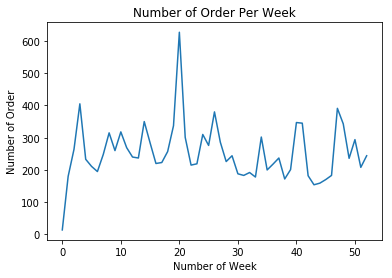

In [4]:
# B Plot the count of orders per week
import matplotlib.pyplot as plt 
data_b = copy.deepcopy(data)

# get week number 
data_b['week_day'] = pd.to_datetime(data_b['date']).dt.week.astype(str)

# Split data
order_number_perWeek = [0]*53
week_2016 = data_b.iloc[:14, 4]
week_2017 = data_b.iloc[14:, 4]

# Count order per week
for i in range(len(week_2017)):
    order_number_perWeek[int(week_2017.iloc[i])] += 1
order_number_perWeek[0] = len(week_2016)

# build plot
x_axis = [0]*53
for i in range(1, len(order_number_perWeek)):
    x_axis[i] = x_axis[i-1] + 1
    
plt.plot(x_axis, order_number_perWeek)
plt.xlabel('Number of Week')
plt.ylabel('Number of Order')
plt.title('Number of Order Per Week')
plt.show()


In [5]:
# C Mean Value for Gender 0 and Gender 1
data_c = copy.deepcopy(data)
mean_value = data_c.groupby(by=['gender']).mean()['value']
print(mean_value)

gender
0    363.890006
1    350.708361
Name: value, dtype: float64


Answer: No, there is no big difference between Gender 0 and Gender 1